In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# import sklearn          

In [2]:
dataset = pd.read_csv('titanic.csv')

In [3]:
dataset.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
dataset=dataset.drop(columns=['class','who','alone'])

In [5]:
dataset.head()

,sex,age,sibsp,parch,fare,embarked,survived
0,male,22.0,1,0,7.2500,S,0
1,female,38.0,1,0,71.2833,C,1
2,female,26.0,0,0,7.9250,S,1
3,female,35.0,1,0,53.1000,S,1
4,male,35.0,0,0,8.0500,S,0


In [6]:
dataset.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64

In [7]:
median=dataset['age'].median()
Max=dataset['embarked'].value_counts().idxmax()
print(Max)
# mode_embarked = dataset['embarked'].mode()[0]
dataset['age']=dataset['age'].fillna(median)
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})
dataset['embarked'] = dataset['embarked'].fillna(Max)
dataset.isnull().sum()
dataset.head()

S


,sex,age,sibsp,parch,fare,embarked,survived
0,0,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,1,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,0,35.0,0,0,8.0500,S,0


In [8]:
# dataset['embarked']=dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)
# Data=pd.get_dummies(Data,columns=['embarked','sex'])
dataset = pd.get_dummies(dataset,columns=['embarked'],drop_first=True)


In [9]:
dataset.head()

,sex,age,sibsp,parch,fare,survived,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0,False,True
1,1,38.0,1,0,71.2833,1,False,False
2,1,26.0,0,0,7.9250,1,False,True
3,1,35.0,1,0,53.1000,1,False,True
4,0,35.0,0,0,8.0500,0,False,True


In [10]:
dataset['embarked_Q']=np.where((dataset['embarked_Q']==True),1,0)
dataset['embarked_S']=np.where((dataset['embarked_S']==True),1,0)

In [11]:
dataset.head()
# dataset.shape

,sex,age,sibsp,parch,fare,survived,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,0,0
2,1,26.0,0,0,7.9250,1,0,1
3,1,35.0,1,0,53.1000,1,0,1
4,0,35.0,0,0,8.0500,0,0,1


In [12]:
x= dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [13]:

print(x.shape)

(891, 7)


In [14]:
x_train=dataset.iloc[:713, :-1]
y_train = dataset.iloc[:713, -1]
x_test = dataset.iloc[713:, :-1]
y_test = dataset.iloc[713:, -1]

In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_train.shape, y_train.shape, y_test.shape, x_test.shape)

y_train=y_train.reshape((-1,1))
print(y_train.shape)

(713, 7) (713,) (178,) (178, 7)
(713, 1)


In [16]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [17]:
def hypothesis(X, theta):
    return 1/(1 + np.exp(-(np.dot(X, theta))))
 

In [18]:

def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1- Y)*np.log(1 - y_p)))
    
    return loss




In [19]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = np.dot(X.T , (Y - y_p))
    
    return grad/X.shape[0]

In [20]:
def gradient_descent(X, Y, learning_rate = 0.3, epochs =1000):
    
    m,n = X.shape
    
    theta = np.zeros((n , 1))
    print(theta.shape)
    cost_epoch = []
    
    for i in range(epochs):
        
        print('The algo is on epoch no : ',i, end = '\r')
        
        loss = cost(X, Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    print(grad.shape, theta.shape)
    return theta, cost_epoch 

In [21]:
theta, cost = gradient_descent(x_train, y_train, learning_rate=0.0004,epochs = 100000)

(7, 1)
(7, 1) (7, 1)n epoch no :  99999


In [23]:
theta

array([[-0.13743337],
       [ 0.03776166],
       [ 0.34779525],
       [ 0.48843573],
       [-0.01058344],
       [-0.11117757],
       [-1.74546065]])

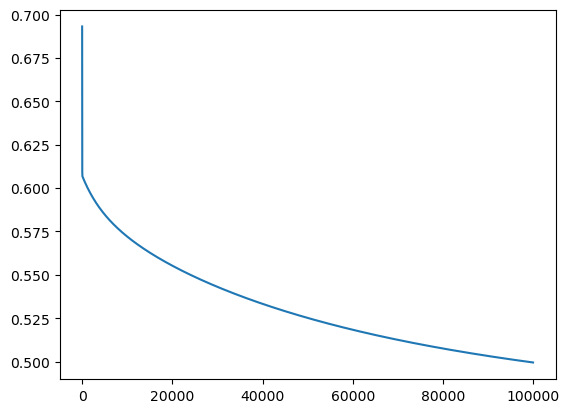

In [24]:
plt.plot(cost)

In [25]:
y_test = y_test.reshape((-1, 1))


In [26]:
y_test.shape

(178, 1)

In [27]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []

    for i in y_p:
        
        if i >= 0.5:
            y_pred.append(1)
            
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)        
    
    return y_pred

In [28]:
pred = predict(x_test, theta)

In [29]:
pred = pred.reshape((-1, 1))

In [30]:
pred.shape

(178, 1)

In [31]:
def accuracy(pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            
            temp += 1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%")    

In [32]:
accuracy(pred, y_test)

Accuracy =  82.02247191011236 %


In [33]:
predict(([1,38.0,1,0,71.2833,0,1]),theta)


array([0])

In [ ]:
theta.shape

In [ ]:
# SVM -> Support Vector Machine on titanic dataset

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [57]:
M1=svm.SVC(kernel='linear',C=0.4,degree=400)
M1.fit(x_train,y_train)

pred=M1.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
# M1.score(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8314606741573034


In [58]:
# Decision tree classifier on titanic dataset

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [62]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.848314606741573

In [66]:
model.score(x_train,y_train)


0.9971949509116409

In [67]:
model.score(x_test,y_test)


0.848314606741573